In [1]:
from client_auth import create_client
client = create_client()

In [2]:
import pandas as pd

In [20]:
nst_est_data = pd.read_csv("../data/nst-est2014-01-cleaned.csv", usecols=["State","Abbrv.",
                                                                "2011.0","2012.0","2013.0","2014.0"])

nst_est_data.columns = ["state", "abbrv", "2011", "2012", "2013", "2014"]
nst_est_data["state"] = nst_est_data["state"].str.replace(".", "")

In [21]:
print(nst_est_data.head())

         state abbrv        2011        2012        2013        2014
0     .Alabama    AL   4799069.0   4815588.0   4830081.0   4841799.0
1      .Alaska    AK    722128.0    730443.0    737068.0    736283.0
2     .Arizona    AZ   6472643.0   6554978.0   6632764.0   6730413.0
3    .Arkansas    AR   2940667.0   2952164.0   2959400.0   2967392.0
4  .California    CA  37638369.0  37948800.0  38260787.0  38596972.0


In [22]:
nst_est_data["state"] = nst_est_data["state"].str.replace(".", "")

<ipython-input-22-ef8a1a8dcde9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  nst_est_data["state"] = nst_est_data["state"].str.replace(".", "")


In [24]:
print(len(nst_est_data))

51


In [23]:
print(nst_est_data.tail(10))

            state abbrv        2011        2012        2013        2014
41   South Dakota    SD    823579.0    833566.0    842316.0    849129.0
42      Tennessee    TN   6399291.0   6453898.0   6494340.0   6541223.0
43          Texas    TX  25645629.0  26084481.0  26480266.0  26964333.0
44           Utah    UT   2814384.0   2853375.0   2897640.0   2936879.0
45        Vermont    VT    627049.0    626090.0    626210.0    625214.0
46       Virginia    VA   8101155.0   8185080.0   8252427.0   8310993.0
47     Washington    WA   6826627.0   6897058.0   6963985.0   7054655.0
48  West Virginia    WV   1856301.0   1856872.0   1853914.0   1849489.0
49      Wisconsin    WI   5705288.0   5719960.0   5736754.0   5751525.0
50        Wyoming    WY    567299.0    576305.0    582122.0    582531.0


In [63]:
agg_pop_data = pd.read_csv("../data/sc-est2019-agesex-civ.csv", usecols=[ "STATE", "NAME", "SEX", "AGE", "POPEST2014_CIV"])

In [64]:
agg_pop_data.head()

,STATE,NAME,SEX,AGE,POPEST2014_CIV
0,0,United States,0,0,3954787
1,0,United States,0,1,3948891
2,0,United States,0,2,3958711
3,0,United States,0,3,4005928
4,0,United States,0,4,4004032


In [65]:
print(len(agg_pop_data))

13572


In [81]:
agg_65 = agg_pop_data[ (agg_pop_data["AGE"] >= 65) &  (agg_pop_data["AGE"] < 999) ] 

In [82]:
agg_65_al = agg_65[agg_65["NAME"] == "Alabama"]

In [68]:
print(len(agg_65_al))

60


In [83]:
agg_65_al

,STATE,NAME,SEX,AGE,POPEST2014_CIV
326,1,Alabama,0,65,54995
327,1,Alabama,0,66,54848
328,1,Alabama,0,67,56873
329,1,Alabama,0,68,41763
330,1,Alabama,0,69,41638
...,...,...,...,...,...
516,1,Alabama,2,81,11471
517,1,Alabama,2,82,10915
518,1,Alabama,2,83,10360
519,1,Alabama,2,84,9816


In [86]:
pop_65_plus_AL = agg_65_al["POPEST2014_CIV"].sum()

In [87]:
pop_65_plus_AL

1483632

In [77]:
dict_pop_65 = {"Alabama": "AL", ""}

In [80]:
for key, val in dict_pop_65.items():
    print(key)

Alabama


In [103]:
states =  list(set(df['NAME']))
states.sort()

In [119]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [120]:
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [136]:
df = agg_65
states =  list(set(df['NAME']))
states.sort()
my_dict = {}
for key, val in abbrev_us_state.items():
    my_dict[val] = {"state": key, "pop_over_65": df.where(df['NAME'] == val)['POPEST2014_CIV'].sum()}

In [137]:
new_df = pd.DataFrame.from_dict(my_dict, orient='index')

In [138]:
new_df.reset_index()

,index,state,pop_over_65
0,Alabama,AL,1483632.0
1,Alaska,AK,139788.0
2,Arizona,AZ,2119908.0
3,Arkansas,AR,931030.0
4,California,CA,9901612.0
5,Colorado,CO,1351320.0
6,Connecticut,CT,1126020.0
7,Delaware,DE,307898.0
8,District of Columbia,DC,154688.0
9,Florida,FL,7541094.0


In [132]:
new_df.iloc[0]

state                AL
pop_over_65    163912.0
Name: Alabama, dtype: object

In [154]:
poverty_data = pd.read_csv("../data/csv/est14us.csv", usecols=['Postal Code', 'Poverty Estimate, All Ages', 
                                                                                                                   'Median Household Income'])
list(poverty_data.columns.values)

['Postal Code', 'Poverty Estimate, All Ages', 'Median Household Income']

In [155]:
poverty_data.head()


,Postal Code,"Poverty Estimate, All Ages",Median Household Income
0,US,48208387.0,53657.0
1,AL,905682.0,42917.0
2,AK,81622.0,70898.0
3,AZ,1195889.0,50036.0
4,AR,539999.0,41335.0


In [158]:
# !pip3 install geopandas splot

     |████████████████████████████████| 994 kB 1.7 MB/s eta 0:00:01
  Using cached Shapely-1.7.1-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
     |████████████████████████████████| 19.3 MB 1.6 MB/s eta 0:00:01    |███▊                            | 2.2 MB 1.1 MB/s eta 0:00:16     |█████▌                          | 3.3 MB 1.2 MB/s eta 0:00:13     |███████                         | 4.2 MB 1.2 MB/s eta 0:00:13     |███████████▉                    | 7.1 MB 1.3 MB/s eta 0:00:10     |████████████▍                   | 7.5 MB 1.3 MB/s eta 0:00:09     |████████████████▌               | 9.9 MB 1.5 MB/s eta 0:00:07
     |████████████████████████████████| 7.6 MB 1.8 MB/s eta 0:00:01     |█████████████████▎              | 4.1 MB 1.4 MB/s eta 0:00:03
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
     |████████████████████████████████| 2.4 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 1.8 MB/s eta 0:00:01

In [226]:
from splot.mapping import vba_choropleth
import geopandas as gpd

In [227]:
poverty_data = gpd.read_file("../data/csv/est14us.csv", usecols=['Postal Code', 'Poverty Estimate, All Ages', 
                                                                                                                   'Median Household Income'])
poverty_data.head()

,State FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages","Poverty Estimate, Age 0-17","Poverty Percent, Age 0-17","Poverty Estimate, Age 5-17 in Families","Poverty Percent, Age 5-17 in Families",Median Household Income,"Poverty Estimate, Age 0-4","Poverty Percent, Age 0-4",geometry
0,00,US,United States,48208387.0,23.7,24.1,15.5,15686012.0,21.7,10714518.0,20.4,53657.0,4658187.0,23.9,None
1,01,AL,Alabama,905682.0,29.1,32.1,19.2,298682.0,27.4,207154.0,25.9,42917.0,88203.0,30.6,None
2,02,AK,Alaska,81622.0,15.3,19.5,11.4,28273.0,15.5,18113.0,14.1,70898.0,9170.0,17.4,None
3,04,AZ,Arizona,1195889.0,27.1,29.7,18.2,406457.0,25.6,278735.0,24.0,50036.0,118958.0,28.4,None
4,05,AR,Arkansas,539999.0,28.1,31.3,18.7,183334.0,26.3,123704.0,24.5,41335.0,55833.0,29.7,None


In [228]:
states = gpd.read_file('../data/cb_2014_us_state_5m/cb_2014_us_state_5m.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [ ]:
states1 = gpd.read_file('../data/cb_2014_us_state_5m/cb_2014_us_state_5m.shp')


<AxesSubplot:>

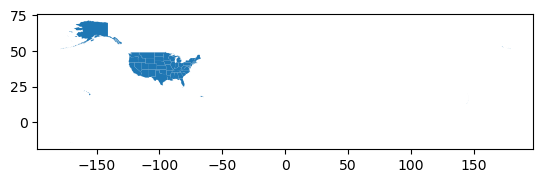

In [229]:
states.plot()

In [302]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [166]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55..."
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,..."
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-73.72777 41.10070 0.00000, -73.69..."
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ..."


In [170]:
states = states.rename(columns={"STUSPS": "Postal Code"})

In [171]:
test = pd.merge(states, poverty_data, on="Postal Code")

In [172]:
test.head()

,STATEFP,STATENS,AFFGEOID,GEOID,Postal Code,NAME,LSAD,ALAND,AWATER,geometry_x,...,90% CI Upper Bound,"Poverty Percent, All Ages","Poverty Estimate, Age 0-17","Poverty Percent, Age 0-17","Poverty Estimate, Age 5-17 in Families","Poverty Percent, Age 5-17 in Families",Median Household Income,"Poverty Estimate, Age 0-4","Poverty Percent, Age 0-4",geometry_y
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-114.79968 32.59362 0.00000, -114....",...,29.7,18.2,406457.0,25.6,278735.0,24.0,50036.0,118958.0,28.4,None
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55...",...,31.3,18.7,183334.0,26.3,123704.0,24.5,41335.0,55833.0,29.7,None
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,...",...,24.0,16.4,2040811.0,22.6,1424469.0,21.9,61927.0,575759.0,23.4,None
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-73.72777 41.10070 0.00000, -73.69...",...,18.2,10.8,113733.0,14.9,78909.0,13.7,70007.0,31176.0,16.8,None
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ...",...,27.5,16.6,962857.0,24.2,666307.0,22.9,47439.0,280898.0,26.5,None


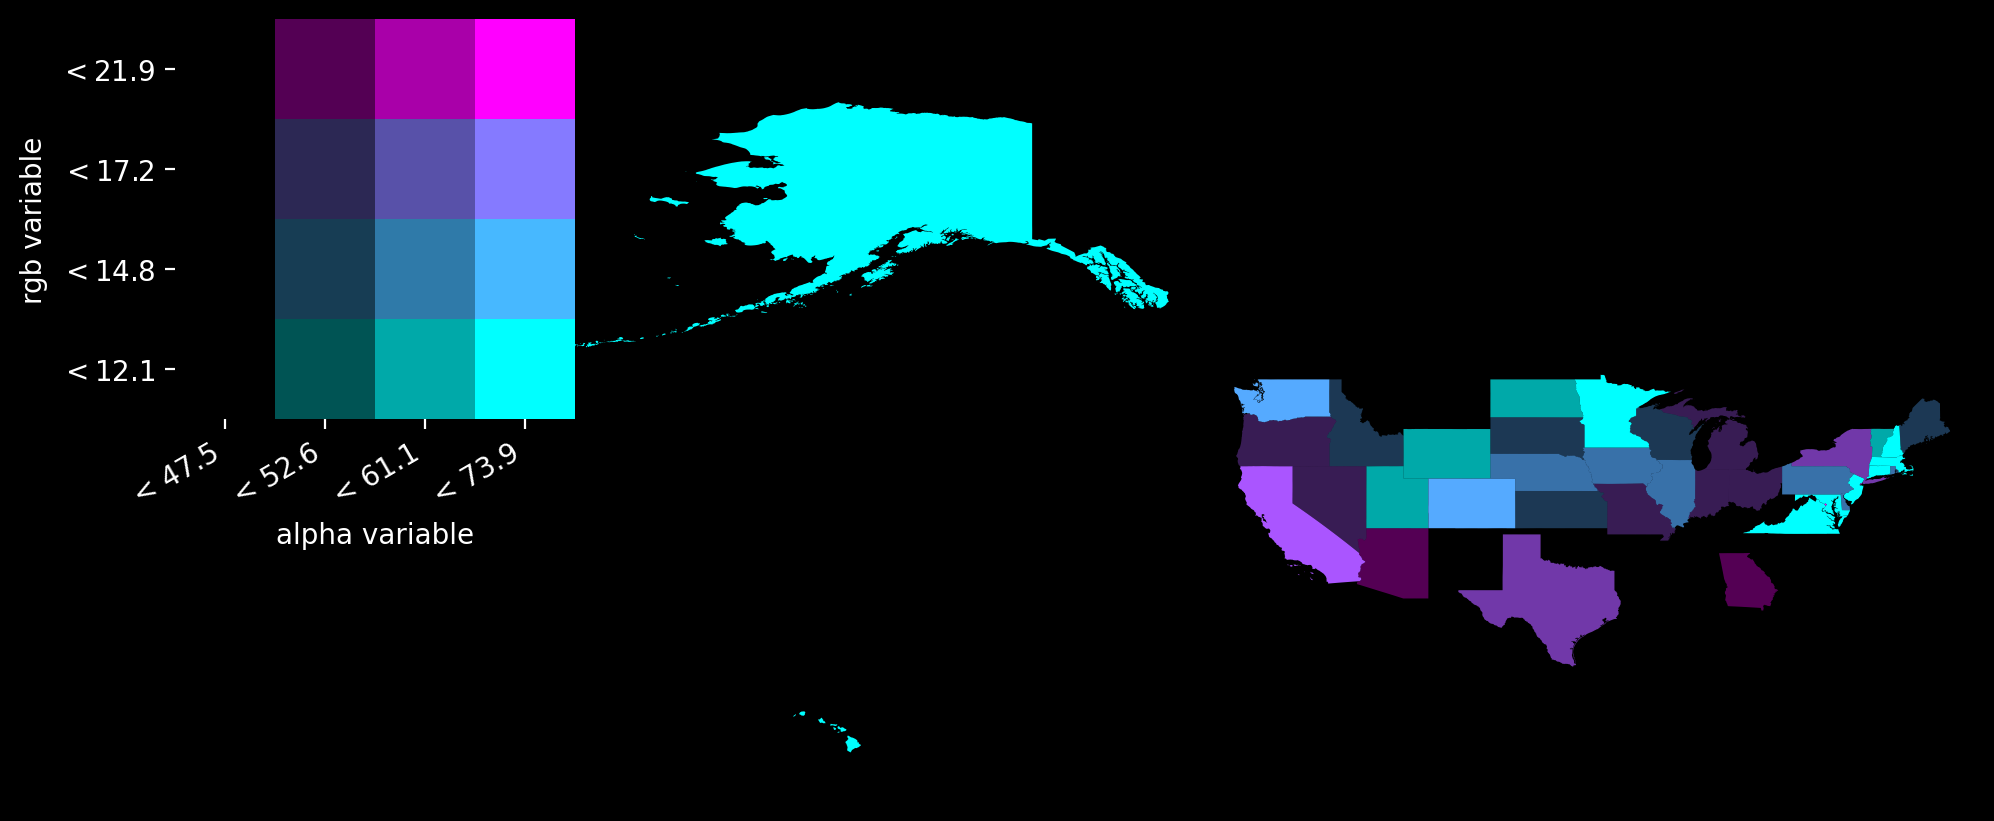

In [330]:
from matplotlib import pyplot as plt
plt.style.use('dark_background') #dark_background, default
# plt.rcParams["figure.figsize"]=10,10

gdf = test
# determines color value
x = gdf['Poverty Percent, All Ages'].values
# determines alpha value
y = gdf['Median Household Income'].values
# colors = ['#e8e8e8', '#dfb0d6', '#be64ac', '#ace4e4', '#a5add3', '#8c62aa', '#5ac8c8', '#5698b9', '#3b4994']
fig = plt.figure(figsize=(10,10)) #dpi=300
ax = fig.add_subplot(111)
# gdf.plot(column='Poverty Percent, All Ages', scheme='quantiles', cmap='RdBu') #, cax=cax
vba_choropleth(x, y, gdf, 
                             rgb_mapclassify=dict(classifier='quantiles', k=4),
                             alpha_mapclassify=dict(classifier='quantiles', k=4),
                             cmap= 'cool', #'RdBu', 
                             ax=ax,
                             revert_alpha=False,
                             legend=True)
ax.set_xlim([-190, -65])
ax.set_ylim([15, 75])
#add title to the map
# ax.set_title('Total revenue of all companies by country', fontdict= 
#             {'fontsize':25})
#remove axes
ax.set_axis_off()
plt.show()

In [183]:
gdf['Poverty Percent, All Ages'] = gdf['Poverty Percent, All Ages'].astype(float)
gdf['Median Household Income'] = gdf['Median Household Income'].astype(float)

In [186]:
test = test.rename(columns={"geometry_x": 'geometry'})

array([[<AxesSubplot:title={'center':'ALAND'}>,
        <AxesSubplot:title={'center':'AWATER'}>],
       [<AxesSubplot:title={'center':'Poverty Percent, All Ages'}>,
        <AxesSubplot:title={'center':'Median Household Income'}>]],
      dtype=object)

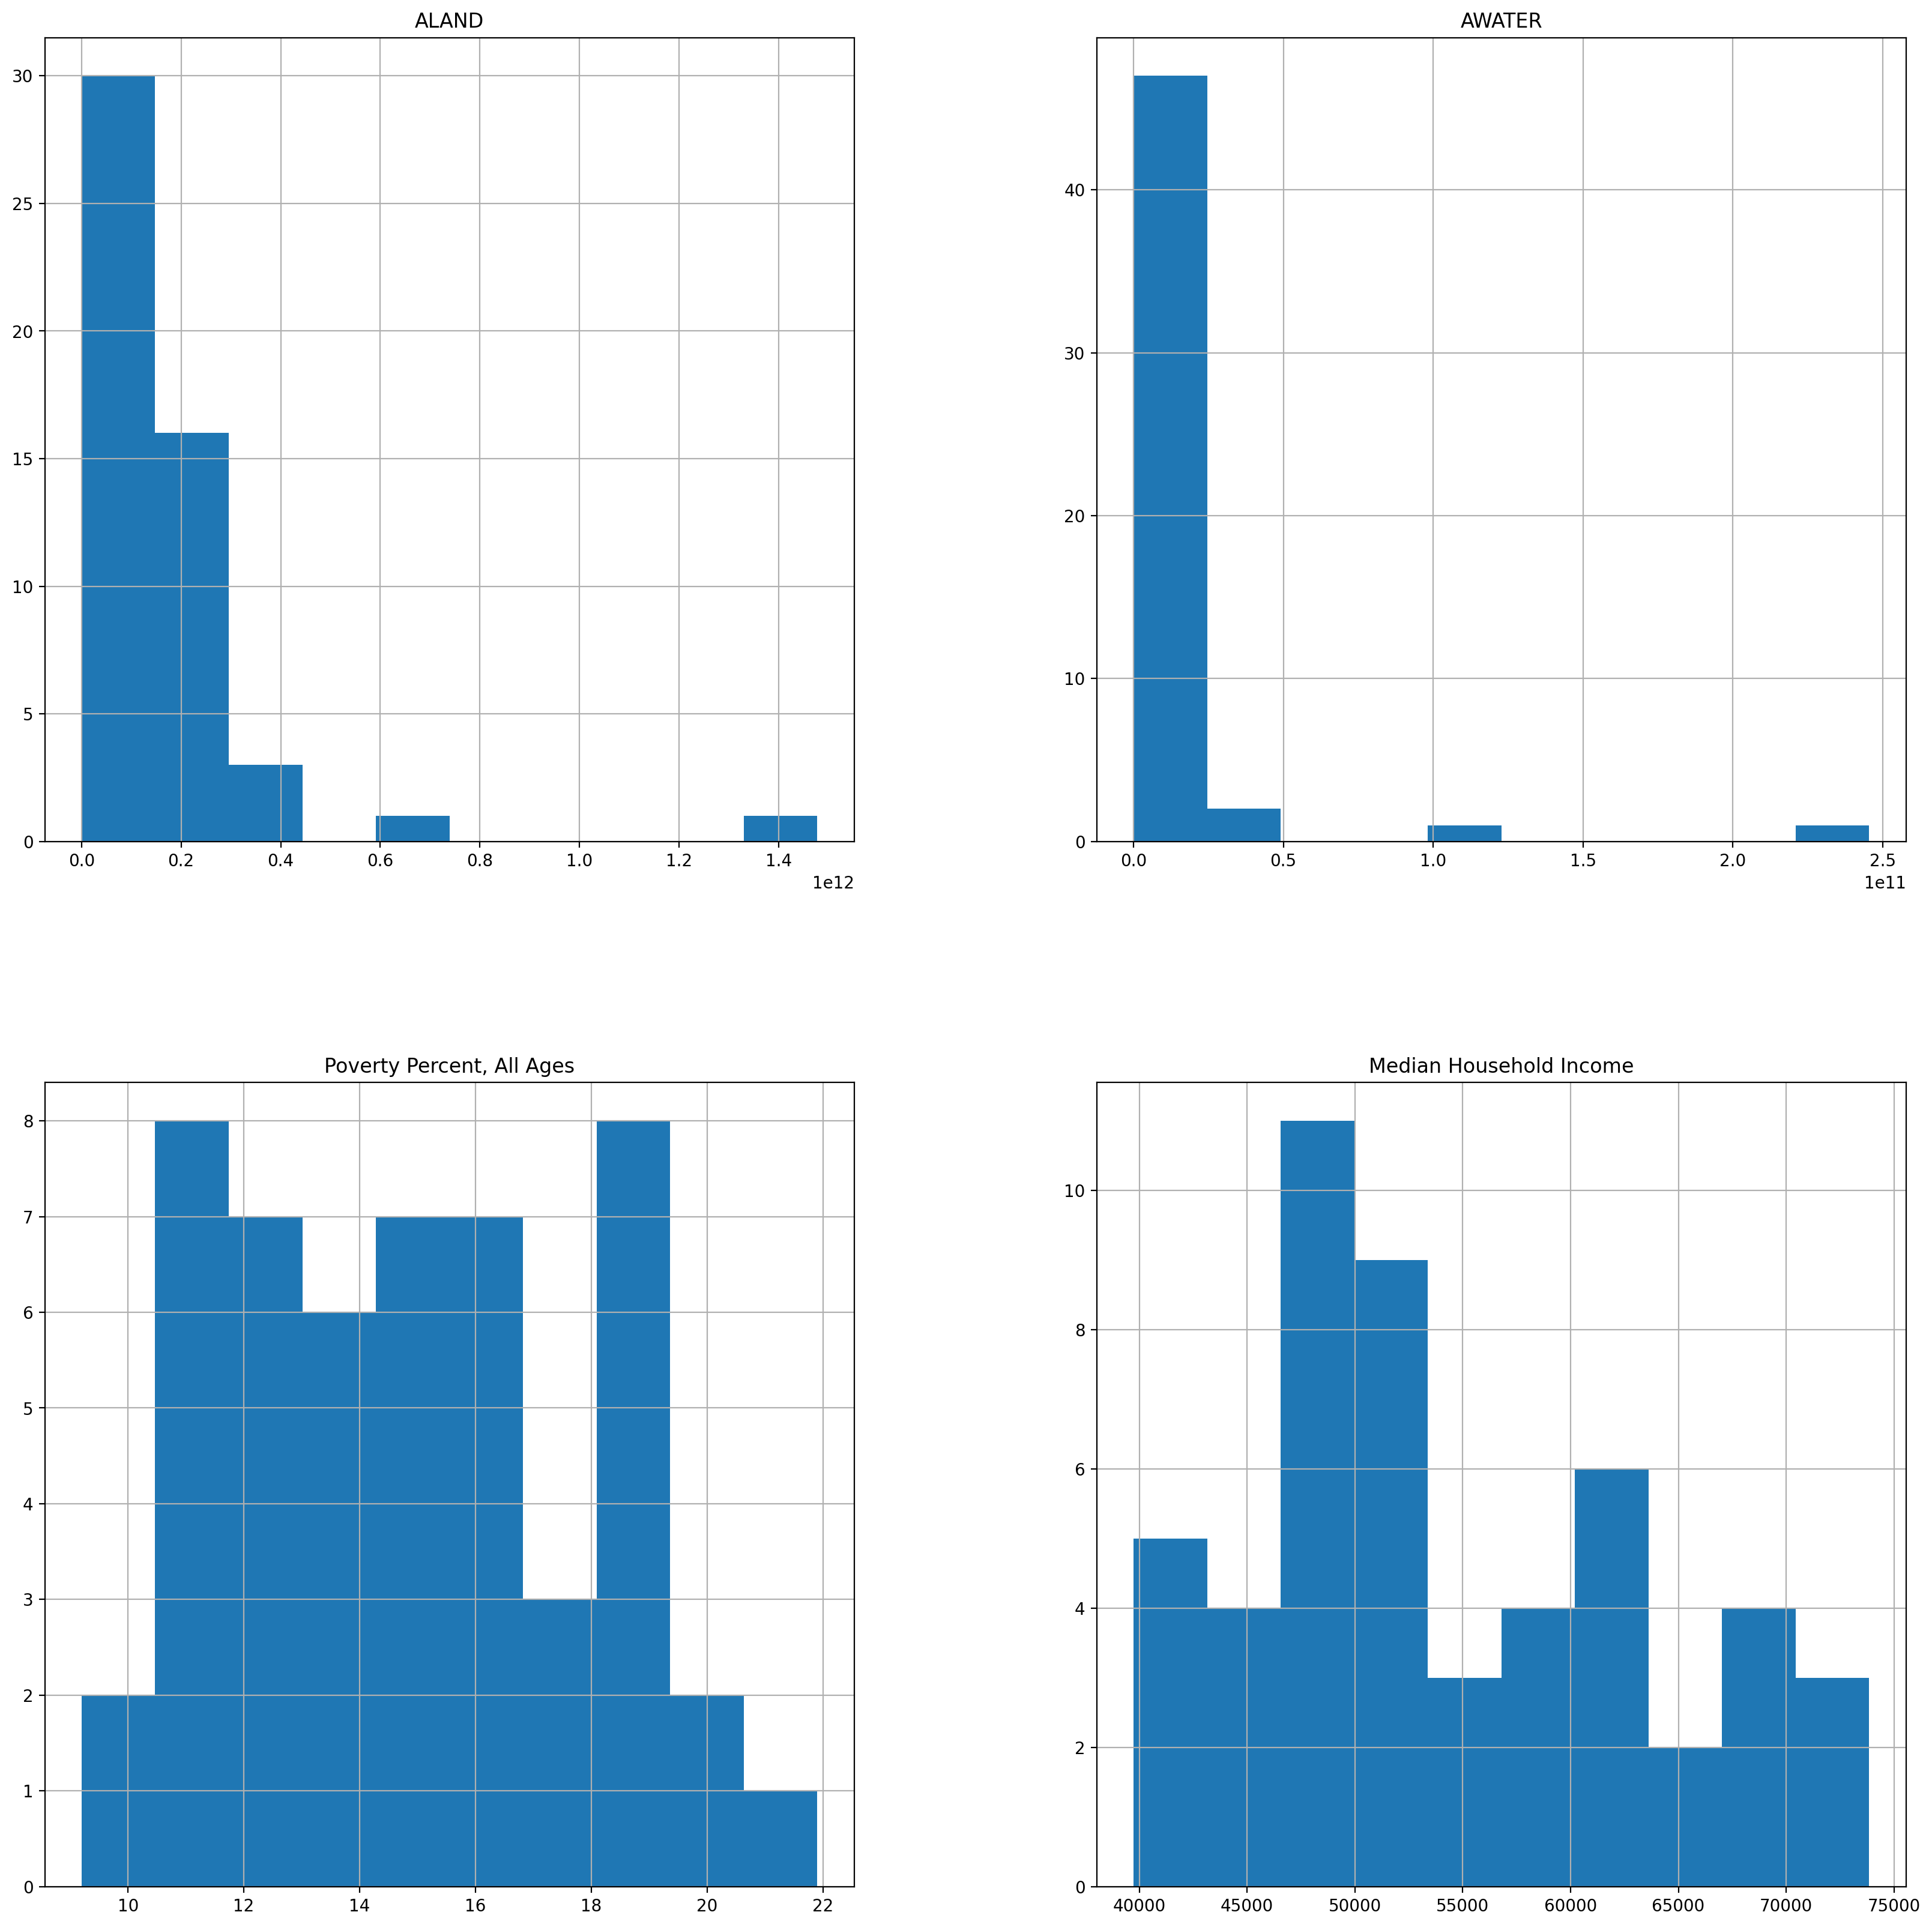

In [260]:
test.hist()

In [307]:
southeast = test[test['Postal Code'].isin(['FL','GA','AL','SC','NC', 'TN', 'AR', 'LA', 'MS'])]

In [308]:
southeast

,STATEFP,STATENS,AFFGEOID,GEOID,Postal Code,NAME,LSAD,ALAND,AWATER,geometry,...,90% CI Upper Bound,"Poverty Percent, All Ages","Poverty Estimate, Age 0-17","Poverty Percent, Age 0-17","Poverty Estimate, Age 5-17 in Families","Poverty Percent, Age 5-17 in Families",Median Household Income,"Poverty Estimate, Age 0-4","Poverty Percent, Age 0-4",geometry_y
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55...",...,31.3,18.7,183334.0,26.3,123704.0,24.5,41335.0,55833.0,29.7,None
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ...",...,27.5,16.6,962857.0,24.2,666307.0,22.9,47439.0,280898.0,26.5,None
5,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",...,30.8,18.4,646960.0,26.3,447407.0,24.8,49240.0,191807.0,29.6,None
10,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,"MULTIPOLYGON Z (((-88.88145 30.05320 0.00000, ...",...,33.1,19.9,307469.0,28.0,207577.0,26.3,44680.0,95627.0,31.6,None
13,28,01779790,0400000US28,28,MS,Mississippi,00,121531899917,3928587545,"MULTIPOLYGON Z (((-88.51067 30.21702 0.00000, ...",...,35.2,21.9,220885.0,30.7,154129.0,29.4,39738.0,63695.0,33.3,None
22,45,01779799,0400000US45,45,SC,South Carolina,00,77857913931,5074749305,"POLYGON Z ((-83.35324 34.72865 0.00000, -83.34...",...,30.3,17.9,281738.0,26.4,195415.0,25.1,45337.0,81681.0,28.7,None
30,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,"MULTIPOLYGON Z (((-88.04374 30.51742 0.00000, ...",...,32.1,19.2,298682.0,27.4,207154.0,25.9,42917.0,88203.0,30.6,None
44,37,01027616,0400000US37,37,NC,North Carolina,00,125917995955,13472722504,"MULTIPOLYGON Z (((-75.72681 35.93584 0.00000, ...",...,28.2,17.2,544149.0,24.1,373438.0,22.6,46596.0,161245.0,27.1,None
47,47,01325873,0400000US47,47,TN,Tennessee,00,106800130794,2352882756,"POLYGON Z ((-90.30988 35.00975 0.00000, -90.30...",...,30.6,18.2,380159.0,25.9,260262.0,24.3,44357.0,113943.0,29.2,None
